In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from  keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Dropout , Flatten

from keras.datasets import cifar10
from keras.utils import to_categorical

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
SEED_VALUE = 42

# Fixing seed value 
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

Loading the CIFAR-10 dataset

* The CIFAR-10 dataset consists of 60,000 color images from 10 classes, with 6,000 images per class.

* There are 50,000 training images and 10,000 test images 

In [3]:
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


* Reviewing some sample images 
* As we can see the image size is quite small hence the detailing is less but enough to train and buld a cnn classifier

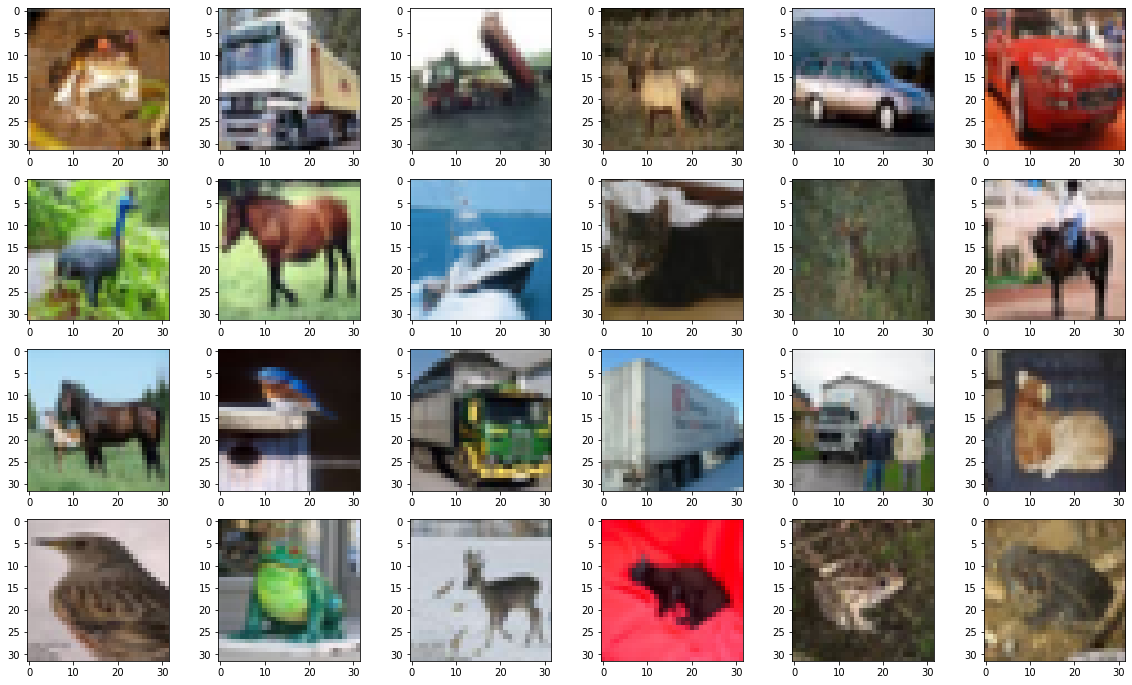

In [4]:
plt.figure(figsize=(20,12))
num_rows = 4
num_cols = 6
for i in range(num_rows*num_cols):
    frame = plt.subplot(num_rows ,num_cols , i+1)
    plt.imshow(X_train[i])
    

Data Pre-Processing :  Normalizing the input set and encoding the output set

In [5]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32")  / 255

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Setting up the defaults for network parameters

In [6]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3
    
@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001 

Building the model 

In [7]:
def cnn_model(input_shape=(32, 32, 3)):
    
    model = Sequential()
    
 
    # Conv Block 1: 32 Filters, MaxPool.

    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Conv Block 2: 64 Filters, MaxPool.
 
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Conv Block 3: 64 Filters, MaxPool.
    
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    # Flatten the convolutional features.
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [8]:
# Create the model.
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [9]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [10]:
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE, 
                    epochs=TrainingConfig.EPOCHS, 
                    verbose=1, 
                    validation_split=.3,
                   )

Epoch 1/31
137/137 [==============================] - 157s 1s/step - loss: 2.1080 - accuracy: 0.2307 - val_loss: 1.7841 - val_accuracy: 0.3467
Epoch 2/31
137/137 [==============================] - 136s 995ms/step - loss: 1.7135 - accuracy: 0.3750 - val_loss: 1.5284 - val_accuracy: 0.4492
Epoch 3/31
137/137 [==============================] - 131s 957ms/step - loss: 1.4921 - accuracy: 0.4607 - val_loss: 1.3940 - val_accuracy: 0.4863
Epoch 4/31
137/137 [==============================] - 122s 890ms/step - loss: 1.3338 - accuracy: 0.5199 - val_loss: 1.5113 - val_accuracy: 0.4513
Epoch 5/31
137/137 [==============================] - 121s 883ms/step - loss: 1.2036 - accuracy: 0.5676 - val_loss: 1.2213 - val_accuracy: 0.5741
Epoch 6/31
137/137 [==============================] - 138s 1s/step - loss: 1.0829 - accuracy: 0.6161 - val_loss: 1.1173 - val_accuracy: 0.6037
Epoch 7/31
137/137 [==============================] - 121s 885ms/step - loss: 0.9712 - accuracy: 0.6550 - val_loss: 0.9763 - val_a

In [11]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS - 1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

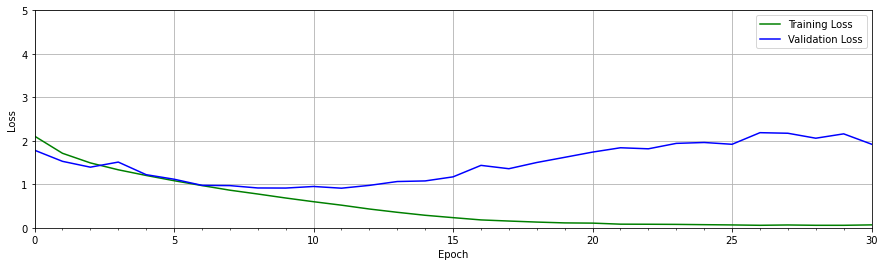

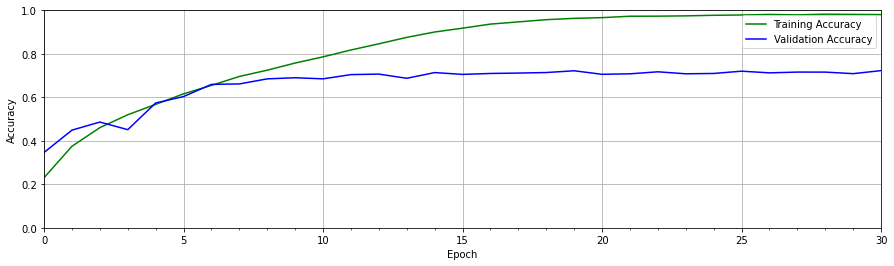

In [12]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

We can clearly observe that in later epochs our model in overfitting as there is a wide gap between validation and training accuracy, so we will try to reduce the later using dropout layer .

In [13]:
def cnn_model_dropout(input_shape=(32, 32, 3)):
    
    model = Sequential()
    
  
    # Conv Block 1: 32 Filters, MaxPool.
  
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

  
    # Conv Block 2: 64 Filters, MaxPool.
  
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

  
    # Conv Block 3: 64 Filters, MaxPool.
  
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
  
    # Flatten the convolutional features.
  
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

Dropout rate is a hyperparameter that controls the probability of a neuron being dropped out

In [14]:
# Create the model.
model_dropout = cnn_model_dropout()
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [15]:
model_dropout.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [16]:
history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE, 
                            epochs=TrainingConfig.EPOCHS, 
                            verbose=1, 
                            validation_split=.3,
                           )

Epoch 1/31
137/137 [==============================] - 129s 845ms/step - loss: 2.1856 - accuracy: 0.1909 - val_loss: 2.0940 - val_accuracy: 0.2313
Epoch 2/31
137/137 [==============================] - 96s 703ms/step - loss: 1.8618 - accuracy: 0.3207 - val_loss: 1.6772 - val_accuracy: 0.3741
Epoch 3/31
137/137 [==============================] - 88s 644ms/step - loss: 1.6543 - accuracy: 0.3976 - val_loss: 1.4647 - val_accuracy: 0.4651
Epoch 4/31
137/137 [==============================] - 85s 620ms/step - loss: 1.5016 - accuracy: 0.4574 - val_loss: 1.3679 - val_accuracy: 0.5077
Epoch 5/31
137/137 [==============================] - 83s 609ms/step - loss: 1.3785 - accuracy: 0.5041 - val_loss: 1.4334 - val_accuracy: 0.5056
Epoch 6/31
137/137 [==============================] - 84s 617ms/step - loss: 1.2713 - accuracy: 0.5444 - val_loss: 1.1506 - val_accuracy: 0.5839
Epoch 7/31
137/137 [==============================] - 84s 612ms/step - loss: 1.1711 - accuracy: 0.5830 - val_loss: 1.0466 - val_a

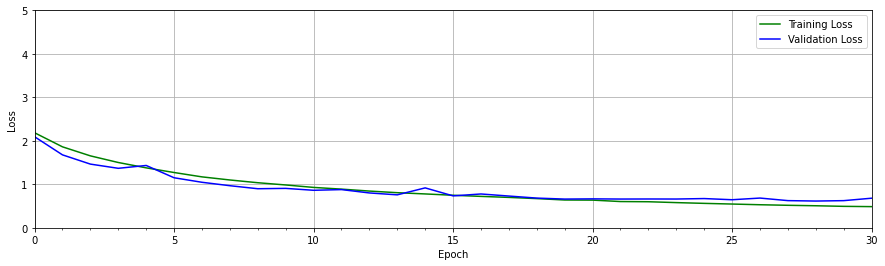

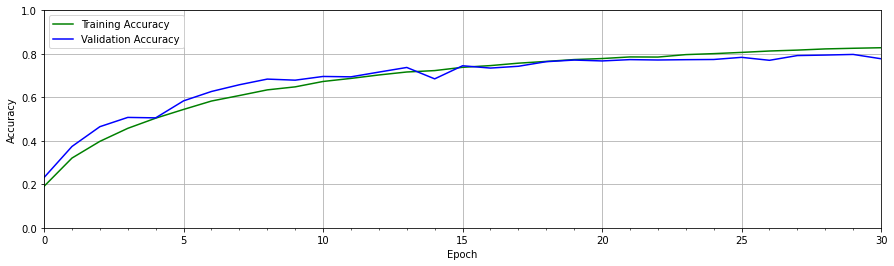

In [17]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

Overfitting mitigated successfully

In [18]:
# Using the save() method, the model will be saved to the file system in the 'SavedModel' format.
model_dropout.save("model_dropout")

INFO:tensorflow:Assets written to: model_dropout\assets


INFO:tensorflow:Assets written to: model_dropout\assets


In [19]:
from keras import models
reloaded_model_dropout = models.load_model('model_dropout')

In [20]:
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 [==============================] - 8s 25ms/step - loss: 0.6911 - accuracy: 0.7735
Test accuracy: 77.350


Defining a custom function to review our predictions over some samples

In [21]:
def evaluate_model(dataset, model):
    class_names = [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
    num_rows = 3
    num_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0 : num_rows * num_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")

        acc = num_matches / (idx + 1)
    print("Prediction accuracy: ", int(100 * acc) / 100)

    return

1/1 [==============================] - 0s 261ms/step
Prediction accuracy:  0.77


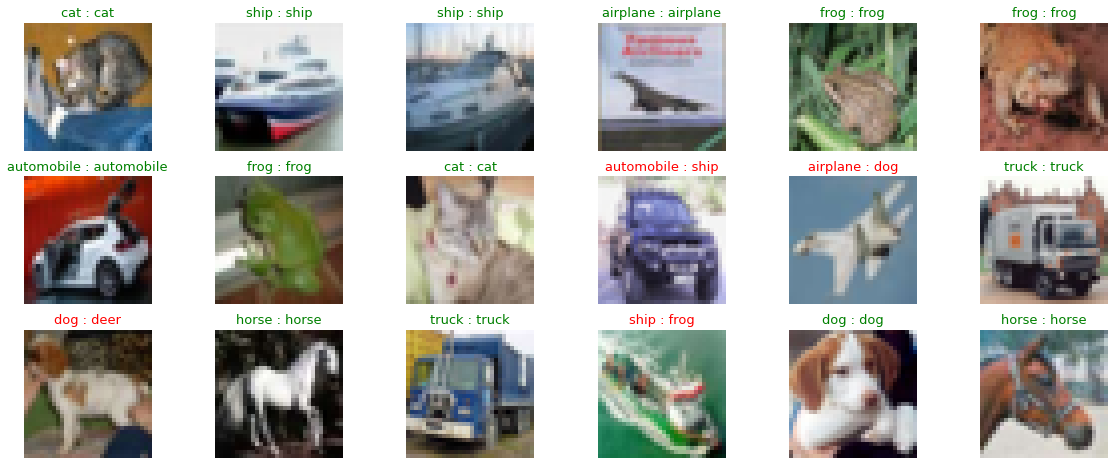

In [22]:
evaluate_model(X_test, reloaded_model_dropout)

In [23]:
# Generate predictions for the test dataset.
predictions = reloaded_model_dropout.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 8s 25ms/step


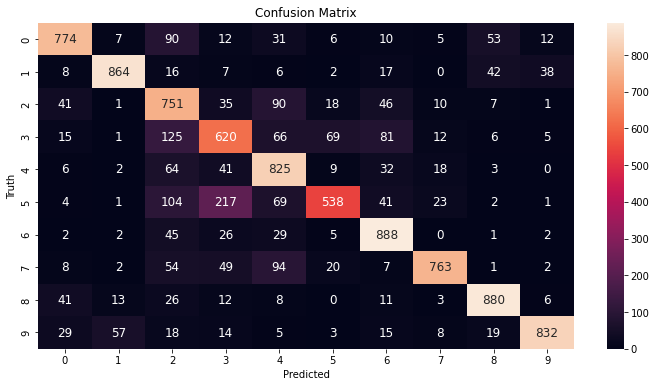

In [24]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[12, 6])
import seaborn as sn

sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()